# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Fixing random state for reproducibility
np.random.seed(2360873)
N = 100


In [2]:
#carregar arquivo
df=pd.read_csv('previsão_renda_fil.csv')
df.drop('Unnamed: 0',axis=1, inplace=True)
df.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,tipo_renda_Assalariado,...,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,2015-01-01,0,0,1,1,36,3.575342,3,3369.24,1,...,0,0,0,0,0,1,0,0,0,0
1,2015-01-01,1,1,1,0,42,0.860274,2,6096.14,0,...,0,0,0,0,0,1,0,0,0,0
2,2015-01-01,1,1,1,2,31,8.065753,4,5658.98,1,...,0,0,0,0,0,1,0,0,0,0
3,2015-01-01,0,1,0,0,50,1.208219,2,7246.69,0,...,0,0,0,0,0,1,0,0,0,0
4,2015-01-01,1,0,0,0,52,13.873973,2,4017.37,1,...,0,0,0,0,0,1,0,0,0,0


In [3]:
df.shape

(15000, 30)

In [4]:
df.data_ref.unique()

array(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
       '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
       '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
       '2016-01-01', '2016-02-01', '2016-03-01'], dtype=object)

In [5]:
# Converter a coluna 'data' para o tipo datetime
df['data_ref'] = pd.to_datetime(df['data_ref'])

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [6]:
# Selecionar apenas as colunas numericas
cols = ['data_ref','qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda','sexo']
df_selected = df[cols]


In [7]:
df_selected['renda']=df_selected['renda'].astype(int)

C:\Users\cacat\AppData\Local\Temp\ipykernel_16740\2257148195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['renda']=df_selected['renda'].astype(int)


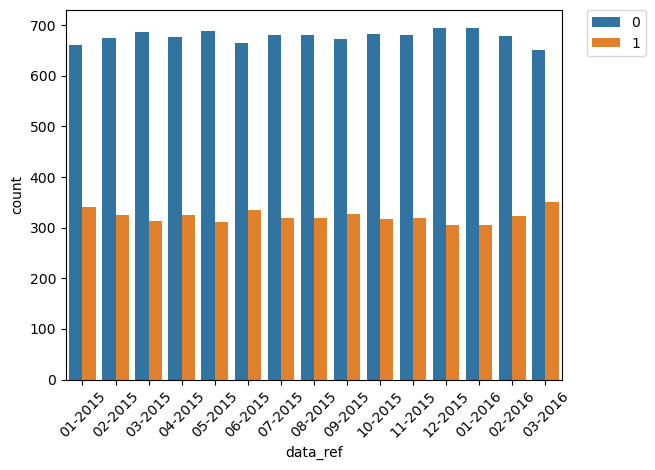

In [8]:
# Plotar o gráfico de barras
ax = sns.countplot(x='data_ref', hue='sexo', data=df_selected)

# Formatar os rótulos do eixo x
tick_labs = df_selected['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticks(list(range(df_selected['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)



# Adicionar legenda
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

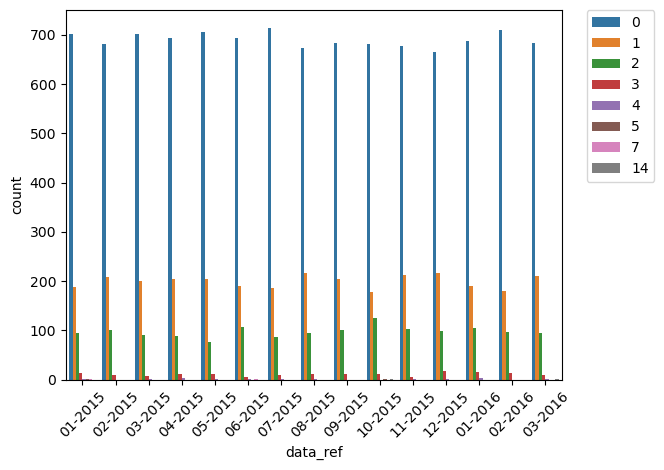

In [9]:
# Plotar o gráfico de barras
ax = sns.countplot(x='data_ref', hue='qtd_filhos', data=df_selected)

# Formatar os rótulos do eixo x
tick_labs = df_selected['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticks(list(range(df_selected['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)



# Adicionar legenda
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

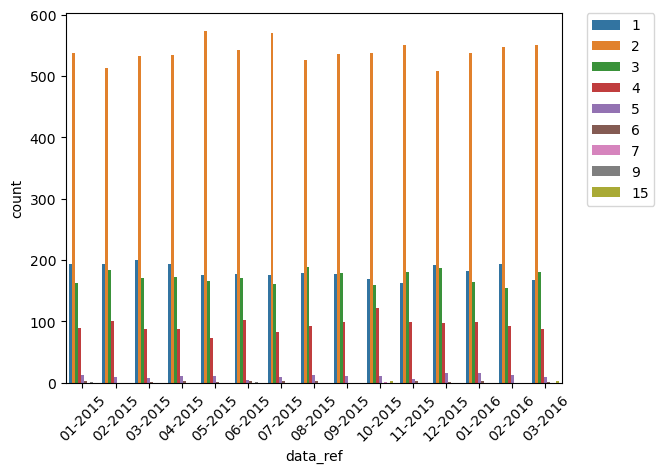

In [10]:
# Plotar o gráfico de barras
ax = sns.countplot(x='data_ref', hue='qt_pessoas_residencia', data=df_selected)

# Formatar os rótulos do eixo x
tick_labs = df_selected['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticks(list(range(df_selected['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)




# Adicionar legenda
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [12]:
df_selected.renda.describe()

count    15000.000000
mean      4624.138267
std       4628.569426
min        159.000000
25%       1945.000000
50%       3278.000000
75%       5642.000000
max      89918.000000
Name: renda, dtype: float64

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

C:\Users\cacat\AppData\Local\Temp\ipykernel_16740\2529170522.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.pointplot(x="data_ref", y="renda", hue = 'sexo',


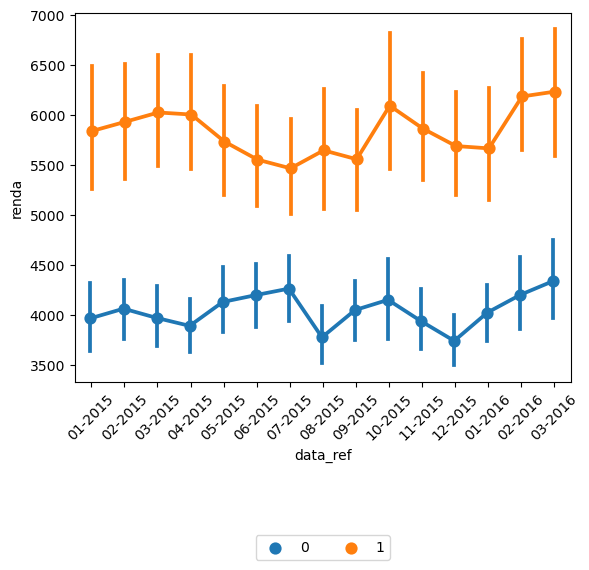

In [28]:
ax = sns.pointplot(x="data_ref", y="renda", hue = 'sexo',
                   data=df_selected, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = df_selected['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df_selected['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)


plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

C:\Users\cacat\AppData\Local\Temp\ipykernel_16740\3546966670.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.pointplot(x="data_ref", y="qtd_filhos", hue = 'sexo',


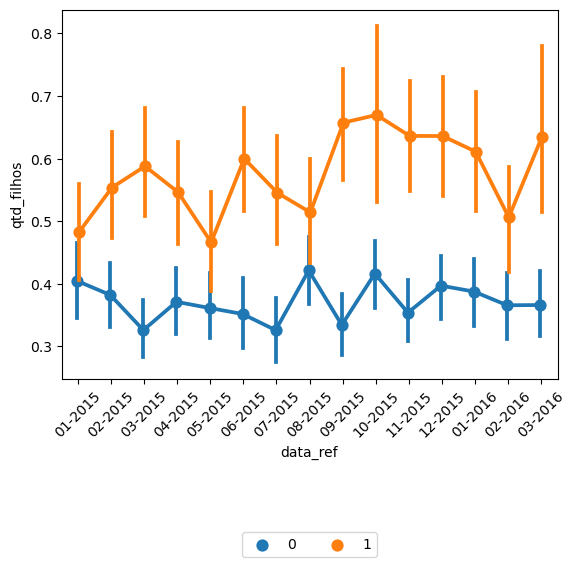

In [30]:
ax = sns.pointplot(x="data_ref", y="qtd_filhos", hue = 'sexo',
                   data=df_selected, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = df_selected['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df_selected['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)


plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

C:\Users\cacat\AppData\Local\Temp\ipykernel_16740\1397215639.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.pointplot(x="data_ref", y="qt_pessoas_residencia", hue = 'sexo',


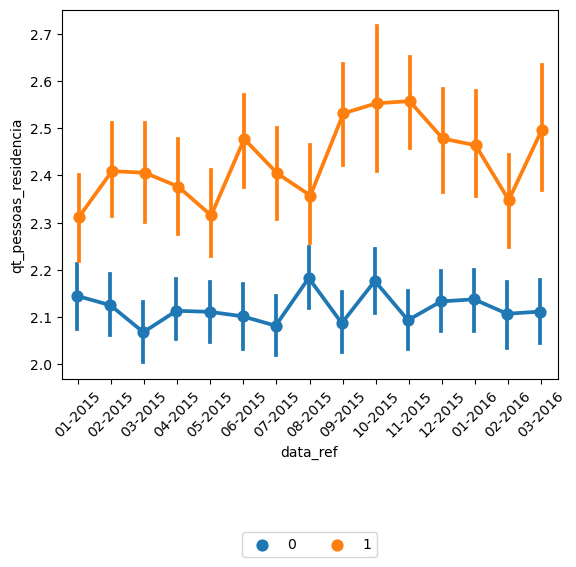

In [31]:
ax = sns.pointplot(x="data_ref", y="qt_pessoas_residencia", hue = 'sexo',
                   data=df_selected, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = df_selected['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df_selected['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)


plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

C:\Users\cacat\AppData\Local\Temp\ipykernel_16740\223222073.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.pointplot(x="data_ref", y="tempo_emprego", hue = 'sexo',


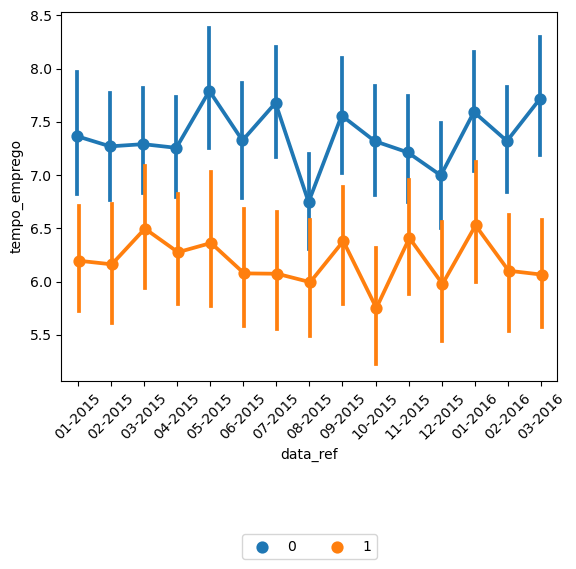

In [32]:
ax = sns.pointplot(x="data_ref", y="tempo_emprego", hue = 'sexo',
                   data=df_selected, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = df_selected['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df_selected['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)


plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

Text(0, 0.5, 'Média do qt_pessoas_residencia')

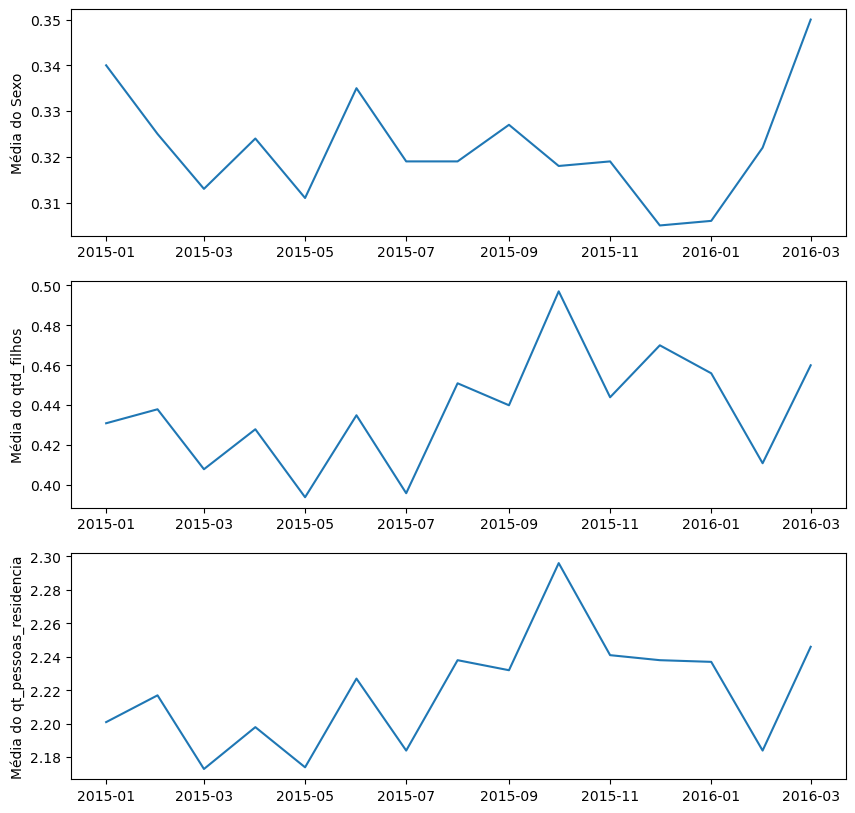

In [29]:
# Calcular as médias para cada nível de cada variável qualitativa
means_sexo = df_selected.groupby('data_ref')['sexo'].mean()
means_qtd_filhos = df_selected.groupby('data_ref')['qtd_filhos'].mean()
means_qt_pessoas_residencia = df_selected.groupby('data_ref')['qt_pessoas_residencia'].mean()

# Plotar os gráficos
fig, axes = plt.subplots(nrows=3, figsize=(10, 10))

# Gráfico para a variável 'sexo'
axes[0].plot(means_sexo.index, means_sexo.values)
axes[0].set_ylabel('Média do Sexo')

# Gráfico para a variável 'estado_civil'
axes[1].plot(means_qtd_filhos.index, means_qtd_filhos.values)
axes[1].set_ylabel('Média do qtd_filhos')

# Gráfico para a variável 'tipo_residencia'
axes[2].plot(means_qt_pessoas_residencia.index, means_qt_pessoas_residencia.values)
axes[2].set_ylabel('Média do qt_pessoas_residencia')

